In [2]:
import pandas as pd
import numpy as np
import dtale
import sweetviz
import io
from pandas_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
train['source'] = 'train'
test['source'] = 'test'

In [6]:
df = pd.concat([train, test])

In [7]:
df.shape 

(455495, 19)

In [8]:
dtale.show(df)

2021-05-24 18:10:16,201 - INFO     - NumExpr defaulting to 8 threads.


In [15]:
train['Stay'] = train['Stay'].replace({'0-10' : 0,
                                     '11-20' : 1,
                                     '21-30': 2,
                                     '31-40': 3,
                                     '41-50': 4,
                                     '51-60': 5,
                                     '61-70': 6, 
                                    '71-80': 7,
                                      '81-90': 8,
                                      '91-100': 9,
                                      'More than 100 Days' : 10
                                     })

In [16]:
feature_config = sweetviz.FeatureConfig(force_num=["Stay"])
swveda = sweetviz.compare([train, 'Train'], [test, 'Test'], "Stay", feature_config)

                                             |                                             | [  0%]   00:00 ->…

In [17]:
swveda.show_html('SWVReport1.html')

Report SWVReport1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="pdprofile_min.html")

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile = ProfileReport(df)
profile.to_file(output_file="pdprofile.html")

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
av = AutoViz_Class()

Shape of your Data Set: (318438, 18)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    17 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Since Number of Rows in data 318438 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Multi_Classification VISUALIZATION Started #####################


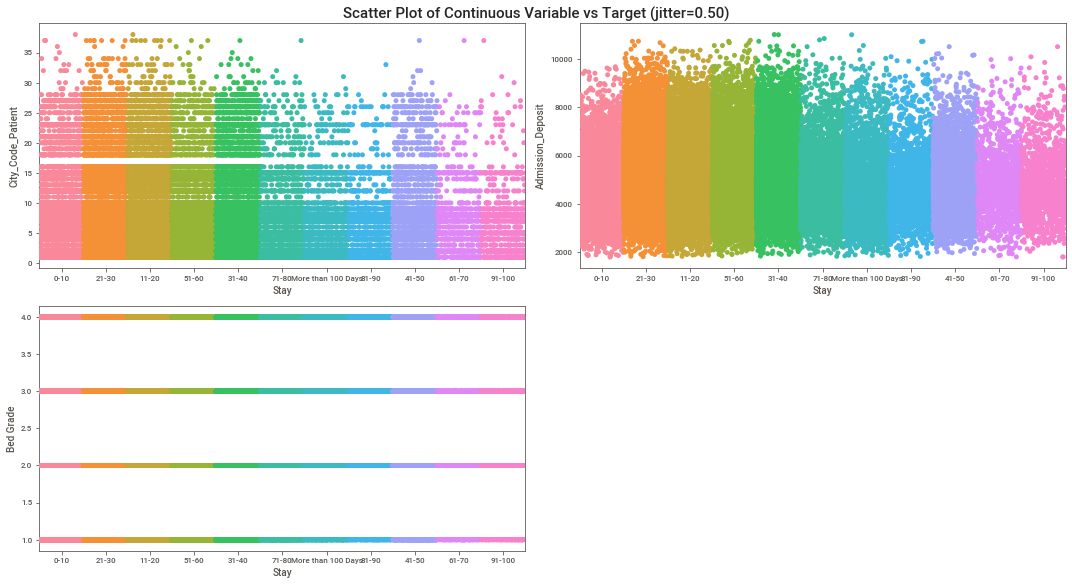

Total Number of Scatter Plots = 6


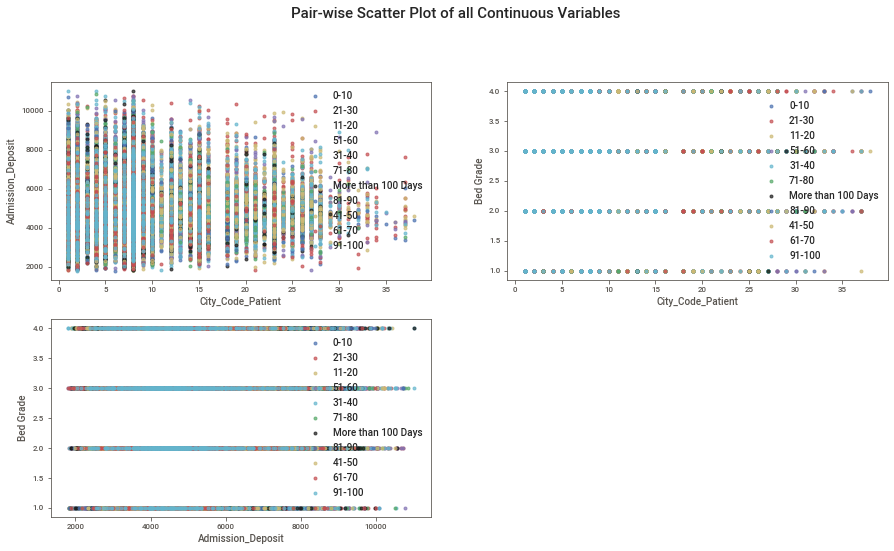

Could not draw Distribution Plots


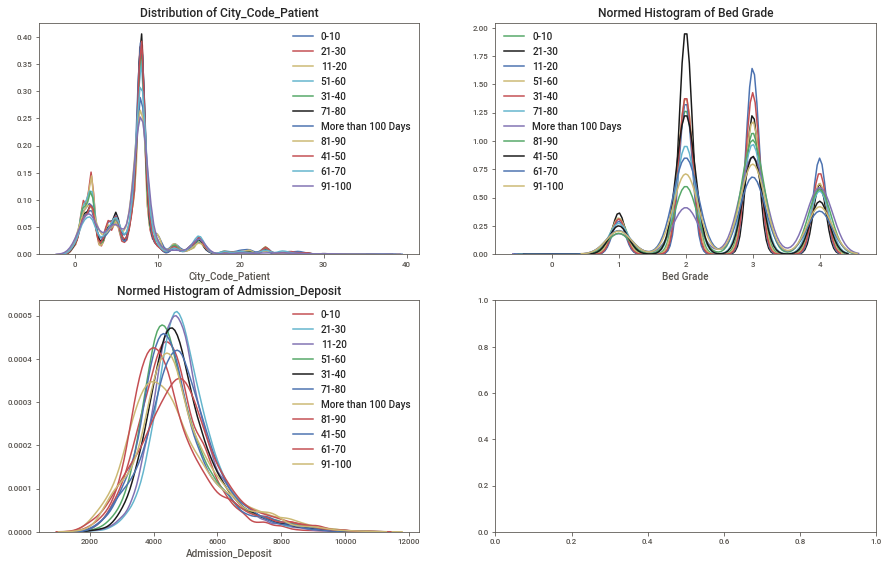

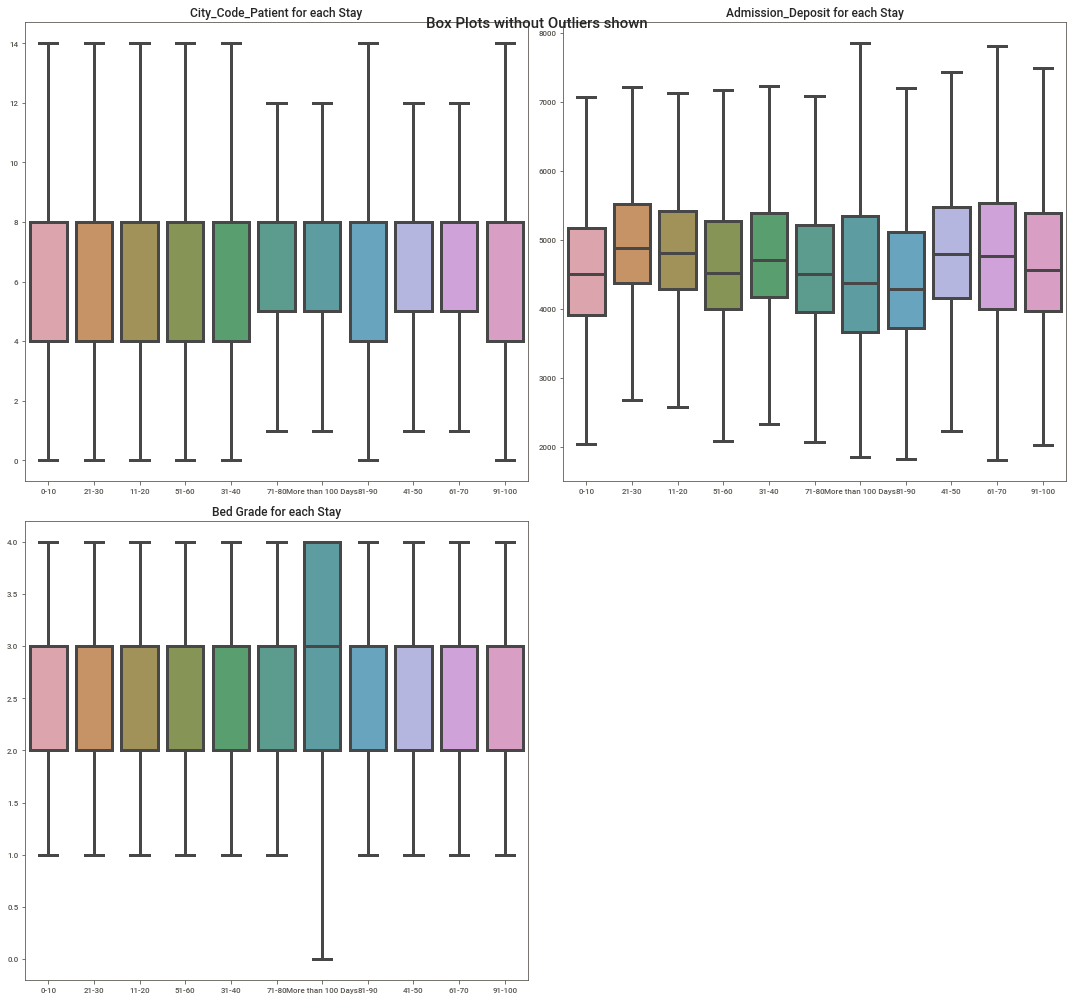

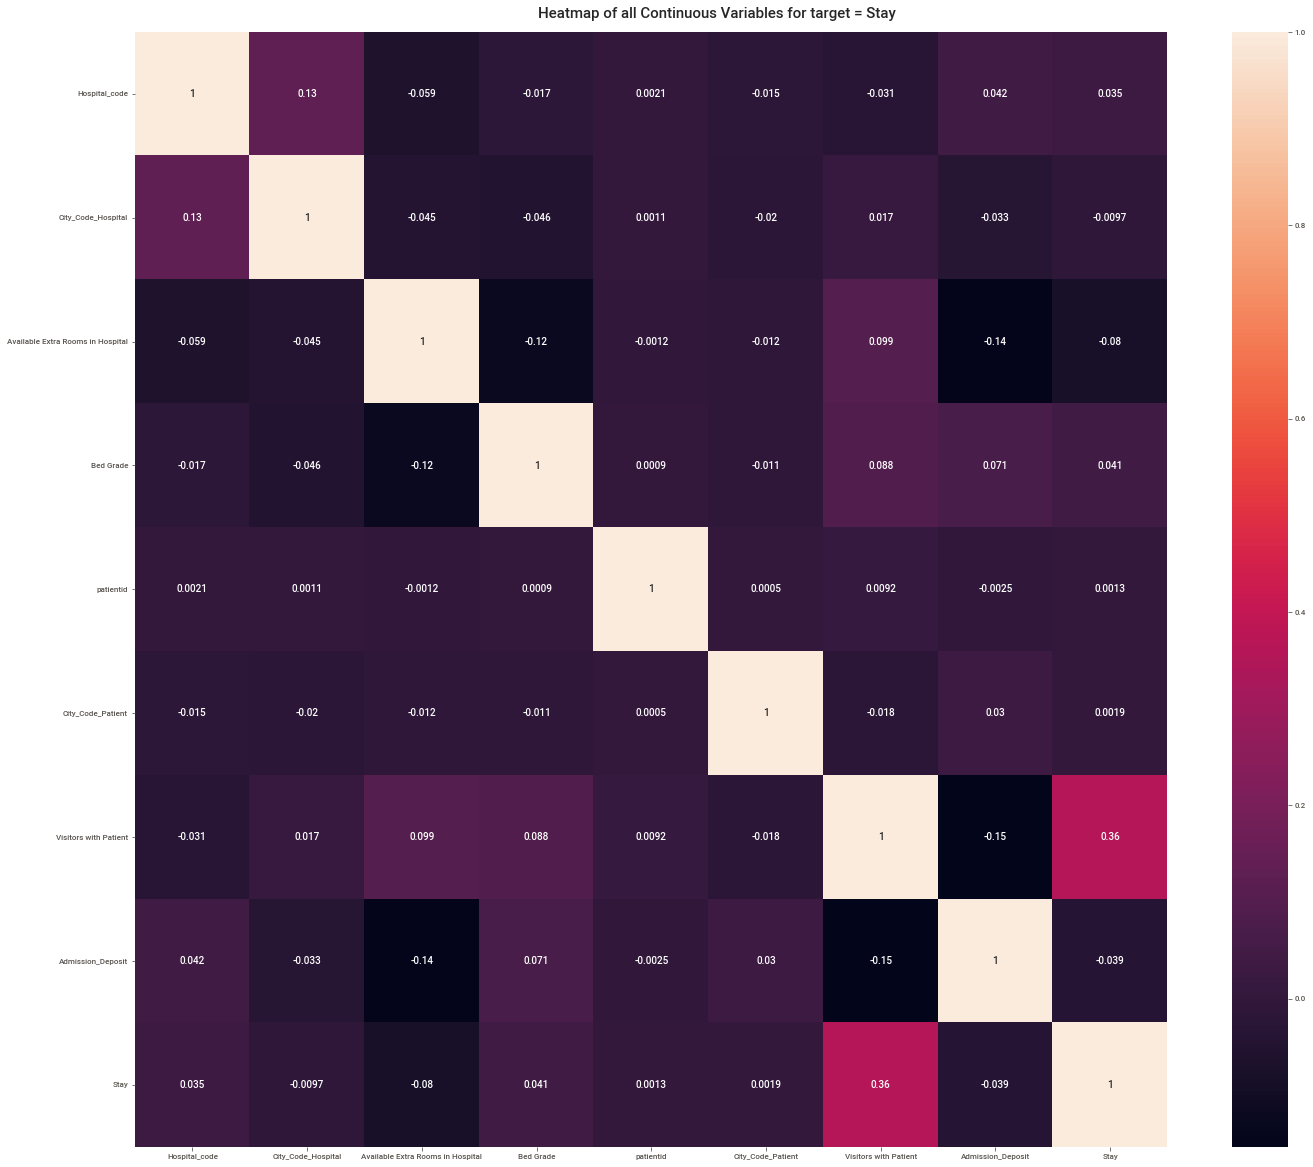

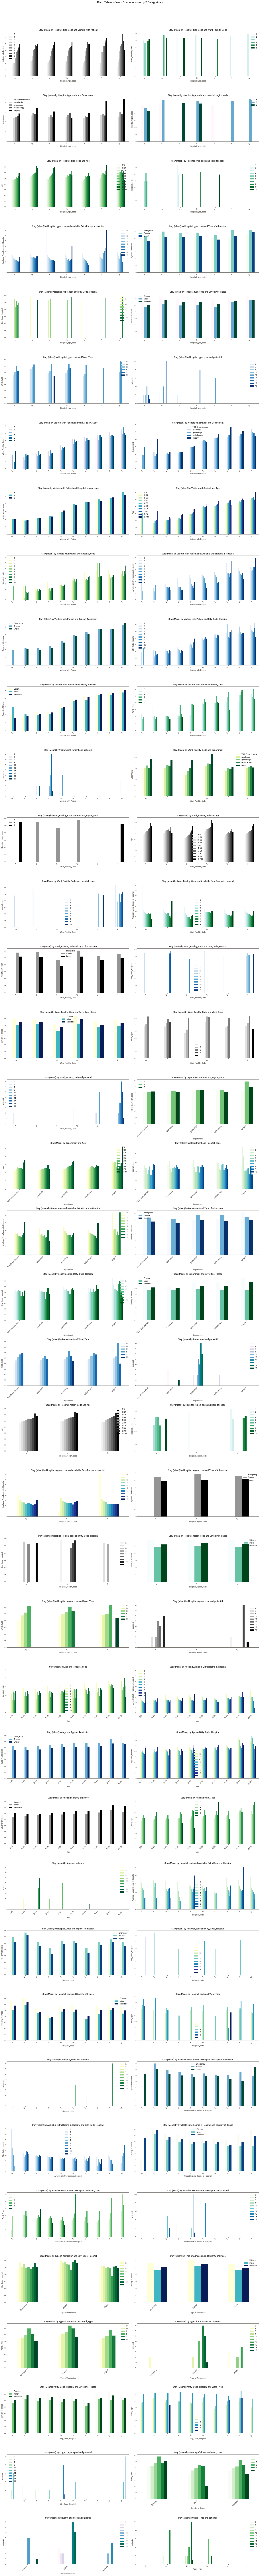

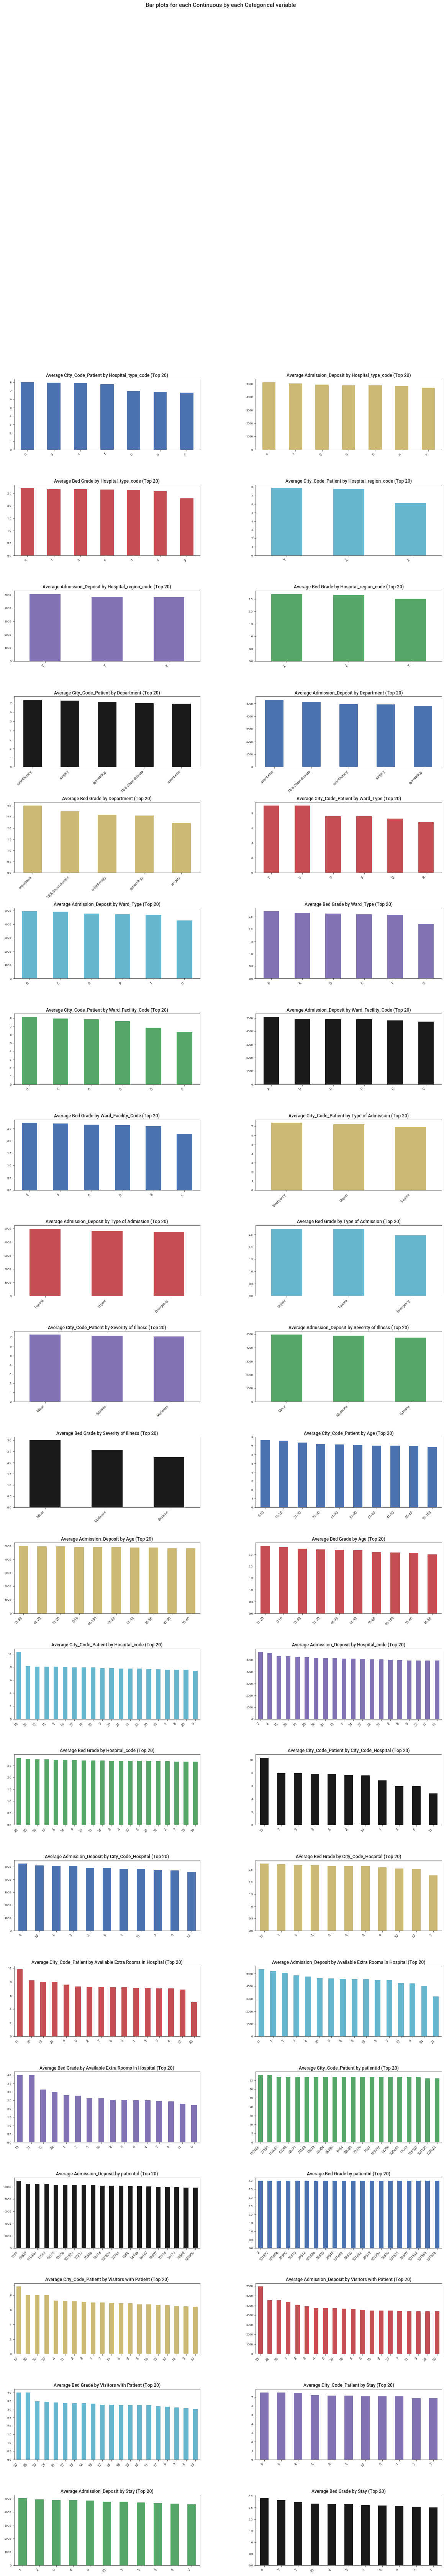

Time to run AutoViz (in seconds) = 100.767

 ###################### VISUALIZATION Completed ########################


In [21]:
filename = "train.csv"
sep = ","
dft = av.AutoViz(
    filename,
    sep=",",
    depVar="Stay",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)